In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# XOR z biasem
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
Y = np.array([[0,1,1,0]])

In [3]:
class SimpleMLP:
    def __init__(self, num_in, num_out, num_hid):
        self.w0 = 2*np.random.random((num_in,num_hid)) - 1
        self.w1 = 2*np.random.random((num_hid,num_out)) - 1
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    def forward(self, x):
        self.y0 = self.sigmoid(np.dot(x,self.w0))
        self.y1 = self.sigmoid(np.dot(self.y0,self.w1))
        
        return self.y1
    def train(self, X, y, learning_rate):
        self.forward(X)
        err=0.5*(self.y1 - y.T)**2
        
        delta1 = (self.y1 - y.T)*(self.y1*(1-self.y1))
        delta0 = delta1.dot(self.w1.T) * self.y0 * (1-self.y0)
        self.w1 -= learning_rate * self.y0.T.dot(delta1)
        self.w0 -= learning_rate * X.T.dot(delta0)
        return np.sum(err)

In [4]:
mlp=SimpleMLP(3, 1, 5)

In [5]:
mlp.train(X, Y, 1)

0.5311085748922674

In [6]:
mlp.forward(X)

array([[0.58155439],
       [0.59380803],
       [0.55754756],
       [0.56632786]])

In [7]:
epochs=[]

In [8]:
for _ in range(1000):
    epochs.append(mlp.train(X, Y, 1))

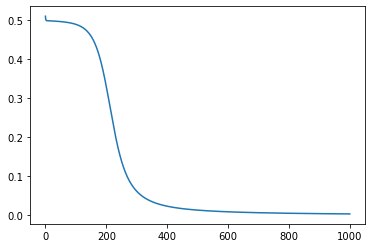

In [9]:
plot(epochs)

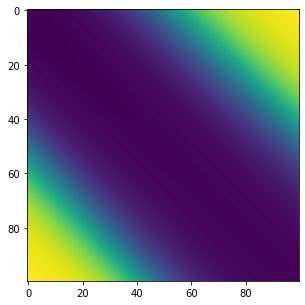

In [10]:
n=100 # rozdzielczość
z=zeros((n,n))
x=linspace(0,1,n)
for i in range(n):
    for j in range(n):
        z[i,j]=mlp.forward([x[j], x[i], 1])
figsize(5,5)
imshow(z);